In [1]:
from preprocess import *
from utilities import *
from constants import *
from supervised_sentiment_analysis import *


[nltk_data] Downloading package wordnet to
[nltk_data]     /yw_data/robert_gold/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


- Reformat results and update them with the manual labels from the two files
- Filter data to only include labeled results and get number of labels

In [2]:
import pickle
merged_results = pickle.load(open('merged_results.pickle', 'rb'))
merged_results = get_manual_tags(merged_results, 'manual_tags_Q1.csv')
merged_results = get_manual_tags(merged_results, 'manual_tags_Q2.csv')
labeled_results = merged_results[~(merged_results['Manual Tag'] == 'no tag')]
labeled_results.shape

(701, 16)

- get a summary of the accuracy of a RandomForestClassifier on the results
    - see [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#) for info on the Random Forest Classifier
    - data is split 70-30 between training and testing
    - "Regular Word Counts" means the feature vectors are raw counts of how many times a word occurs in each text
    - "TFIDF Normalized Word Counts" means the feature vectors are normalized using term frequency–inverse document frequency
        - see [here](https://en.wikipedia.org/wiki/Tf–idf) for info on tf-idf
    - Summaries given for classfication on all data, just question 1, and just question 2
    - labels are given as \[-1, -0.5, 0, 0.5, 1\] indicating negative, slightly negative, neutral, slightly positive, or positive responses, respectively

In [3]:
q1_merged_results = merged_results[merged_results['Question']==Q1]
q2_merged_results = merged_results[merged_results['Question']==Q1]
for data in [merged_results, q1_merged_results, q2_merged_results]:
    random_forest_accuracy_summary(data)
    print()

Accuracy for Regular Word Counts
Accuracy: 0.7725118483412322
Accuracy for TFIDF Normalized Word Counts
Accuracy: 0.7582938388625592

Accuracy for Regular Word Counts
Accuracy: 0.7266666666666667
Accuracy for TFIDF Normalized Word Counts
Accuracy: 0.76

Accuracy for Regular Word Counts
Accuracy: 0.8
Accuracy for TFIDF Normalized Word Counts
Accuracy: 0.7866666666666666



- Exactly the same as above, except responses are classified as negative (-1 or -0.5), neutral (0) or positive (0.5 or 1)

In [4]:
q1_labeled_results = labeled_results[labeled_results['Question'] == Q1]
get_word_counts(q1_labeled_results).shape

(500, 713)

In [5]:
for data in [merged_results, q1_merged_results, q2_merged_results]:
    random_forest_accuracy_summary(data, key = 'Categorical Tag')
    print()

Accuracy for Regular Word Counts
Accuracy: 0.8009478672985783
Accuracy for TFIDF Normalized Word Counts
Accuracy: 0.8104265402843602

Accuracy for Regular Word Counts
Accuracy: 0.8
Accuracy for TFIDF Normalized Word Counts
Accuracy: 0.7866666666666666

Accuracy for Regular Word Counts
Accuracy: 0.88
Accuracy for TFIDF Normalized Word Counts
Accuracy: 0.8733333333333333



- plot confusion matrices using Random Forest Classifier (rfc), Gaussian Naive Bayes (gnb), and Support Vector Classification (svc)
    - Info on [Random Forest](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#), [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html#sklearn.naive_bayes.GaussianNB), and [Support Vector Classification](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)
    - Confusion matrices are made based on positive, negative, or neutral responses
    - Numbers in heatmap indicate total counts and normalized counts for each cell
    - Given for Question 1 results, Question 2 results, and combined results in that order

Results for Question 1
Confusion matrix, without normalization
[[20  3  9]
 [ 1 72  5]
 [ 5  6 29]]
Normalized confusion matrix
[[0.625      0.09375    0.28125   ]
 [0.01282051 0.92307692 0.06410256]
 [0.125      0.15       0.725     ]]


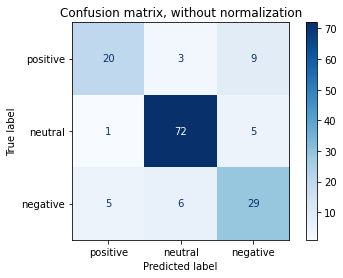

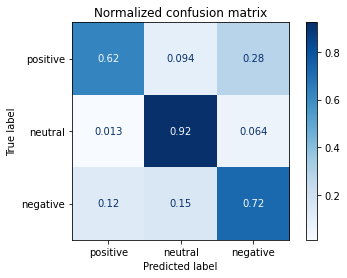

Results for Question 2
Confusion matrix, without normalization
[[ 0  2  0]
 [ 0 52  0]
 [ 0  7  0]]
Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


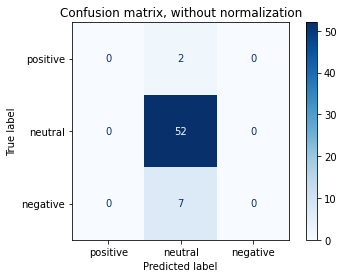

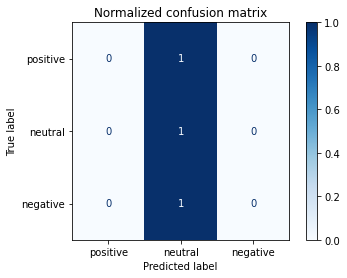

Results for Combined Questions
Confusion matrix, without normalization
[[ 14  13   6]
 [  2 133   6]
 [  1  14  22]]
Normalized confusion matrix
[[0.42424242 0.39393939 0.18181818]
 [0.0141844  0.94326241 0.04255319]
 [0.02702703 0.37837838 0.59459459]]


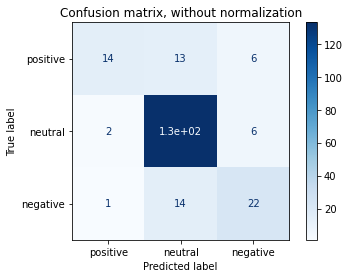

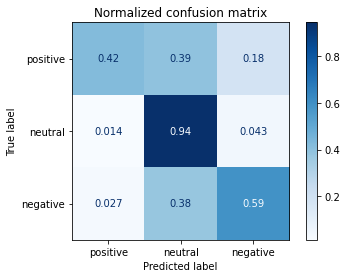

In [6]:
confusion_matrix_summary(merged_results, model = 'rfc')

Results for Question 1
Confusion matrix, without normalization
[[23  2  4]
 [ 7 78  2]
 [ 5 11 18]]
Normalized confusion matrix
[[0.79310345 0.06896552 0.13793103]
 [0.08045977 0.89655172 0.02298851]
 [0.14705882 0.32352941 0.52941176]]


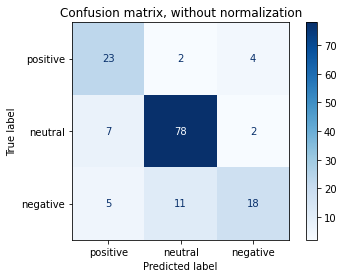

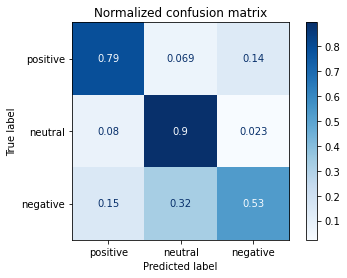

Results for Question 2
Confusion matrix, without normalization
[[ 0  3  0]
 [ 1 39  5]
 [ 3  7  3]]
Normalized confusion matrix
[[0.         1.         0.        ]
 [0.02222222 0.86666667 0.11111111]
 [0.23076923 0.53846154 0.23076923]]


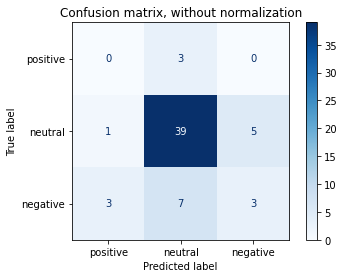

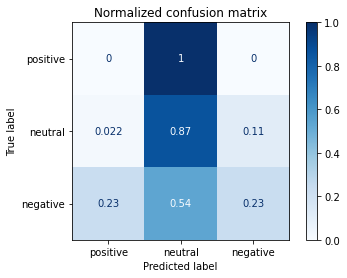

Results for Combined Questions
Confusion matrix, without normalization
[[19  2 10]
 [14 38 84]
 [ 3  4 37]]
Normalized confusion matrix
[[0.61290323 0.06451613 0.32258065]
 [0.10294118 0.27941176 0.61764706]
 [0.06818182 0.09090909 0.84090909]]


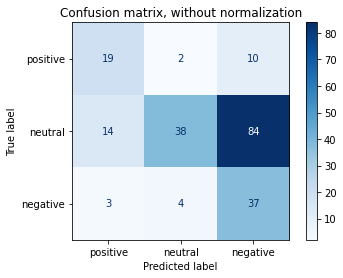

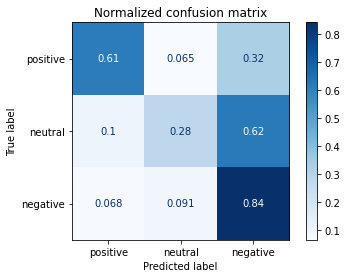

In [7]:
confusion_matrix_summary(merged_results, model = 'gnb')

Results for Question 1
Confusion matrix, without normalization
[[20  2  8]
 [ 8 78  0]
 [ 8  7 19]]
Normalized confusion matrix
[[0.66666667 0.06666667 0.26666667]
 [0.09302326 0.90697674 0.        ]
 [0.23529412 0.20588235 0.55882353]]


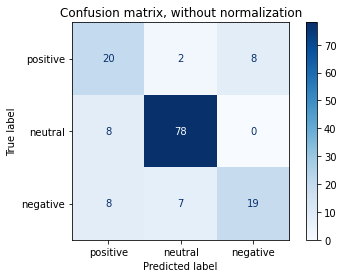

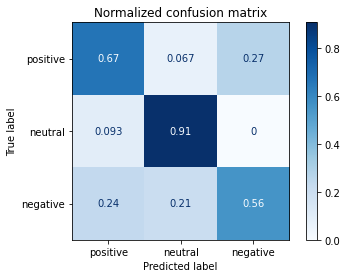

Results for Question 2
Confusion matrix, without normalization
[[ 0  4  0]
 [ 0 50  0]
 [ 0  7  0]]
Normalized confusion matrix
[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


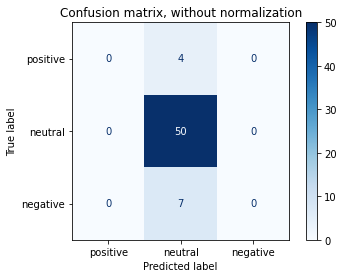

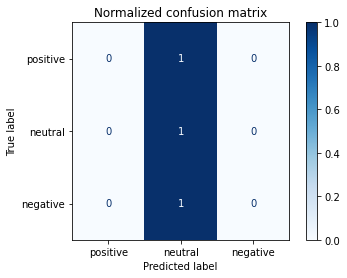

Results for Combined Questions
Confusion matrix, without normalization
[[ 19  14   3]
 [ 11 111   2]
 [  8  25  18]]
Normalized confusion matrix
[[0.52777778 0.38888889 0.08333333]
 [0.08870968 0.89516129 0.01612903]
 [0.15686275 0.49019608 0.35294118]]


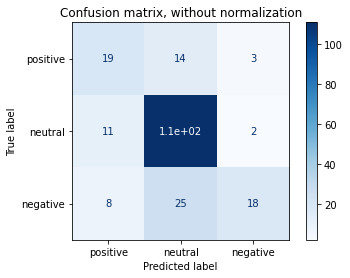

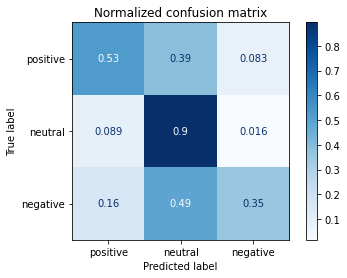

In [8]:
confusion_matrix_summary(merged_results, model = 'svc')

In [9]:
TRIALS = 1
SPLITS = 100

In [10]:
q1_labeled_results = labeled_results[labeled_results['Question'] == Q1]
features = get_word_counts(q1_labeled_results)
features_tfidf = get_tfidf(q1_labeled_results)
features = features_tfidf
labels = np.array(q1_labeled_results['Categorical Tag'])
conf_matrices = get_conf_matrices(features, labels, clfs = ['svc', 'gnb', 'rfc'], trials = TRIALS, splits = SPLITS, test_size = 0.3)

10 trials done out of 100
20 trials done out of 100
30 trials done out of 100
40 trials done out of 100
50 trials done out of 100
60 trials done out of 100
70 trials done out of 100
80 trials done out of 100
90 trials done out of 100
100 trials done out of 100


[[0.74195386 0.05696383 0.20108231]
 [0.05415883 0.86383929 0.08200188]
 [0.09774941 0.01007726 0.89217333]]
AxesSubplot(0.125,0.125;0.775x0.755)


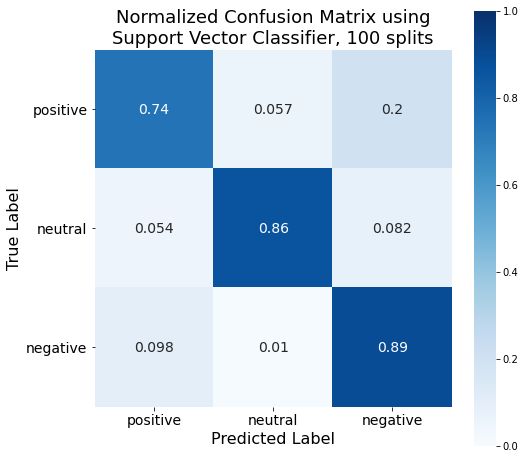

In [11]:
get_average_heatmaps({'svc': conf_matrices['svc']}, trials = TRIALS, splits = SPLITS, normalize = True)

In [12]:
cv_count = 10
get_cross_validation_scores(features, labels, svm.SVC(), cv_count = cv_count)
get_cross_validation_scores(features, labels, RandomForestClassifier(), cv_count = cv_count)
get_cross_validation_scores(features.toarray(), labels, GaussianNB(), cv_count = cv_count)

Accuracy: 0.86 (+/- 0.05)
Accuracy: 0.86 (+/- 0.07)
Accuracy: 0.79 (+/- 0.10)


array([0.78, 0.86, 0.8 , 0.76, 0.74, 0.76, 0.78, 0.78, 0.72, 0.9 ])

In [13]:
svc = svm.SVC()
rfc = RandomForestClassifier()
gnb = GaussianNB()
for clf in [svc, rfc, gnb]:
    arr = np.array(get_kappa(features.toarray(), labels, clf, trials = 100))
    print(arr.mean(), 2*arr.std())
    

0.7264741593634331 0.08846197123595723
0.7153827208225136 0.09168878436051205
0.6410710296656258 0.09362628554976728


In [14]:
def macro_F(conf_matrix):
    dim = len(conf_matrix)
    F_scores = []
    for k in range(dim):
        correct = conf_matrix[k][k]
        false_positive = sum([conf_matrix[j][k] for j in range(dim)])-correct
        false_negative = sum([conf_matrix[k][j] for j in range(dim)])-correct
        precision = correct/(correct+false_positive)
        recall = correct/(correct+false_negative)
        F = 2*precision*recall/(precision+recall)
        F_scores.append(F)
    return np.mean(F_scores)

In [15]:
for clf, conf_matrix in conf_matrices.items():
    macro_F_scores = []
    print(clf)
    for conf_matrix in conf_matrix:
        macro_F_scores.append(macro_F(conf_matrix))
    print((np.mean(macro_F_scores), 2*np.std(macro_F_scores)))

svc
(0.808416738477897, 0.06484806724274408)
gnb
(0.7325521986369975, 0.0747342931038026)
rfc
(0.7869870332585984, 0.07002617020683197)
